In [1]:
import sys

sys.path.append('../')

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/incidents_train.csv')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

assert df.id.is_unique == True

## Análise Exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5082 non-null   int64 
 1   year              5082 non-null   int64 
 2   month             5082 non-null   int64 
 3   day               5082 non-null   int64 
 4   country           5082 non-null   object
 5   title             5082 non-null   object
 6   text              5082 non-null   object
 7   hazard-category   5082 non-null   object
 8   product-category  5082 non-null   object
 9   hazard            5082 non-null   object
 10  product           5082 non-null   object
dtypes: int64(4), object(7)
memory usage: 436.9+ KB


In [5]:
df.head()

,id,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


### Univariada


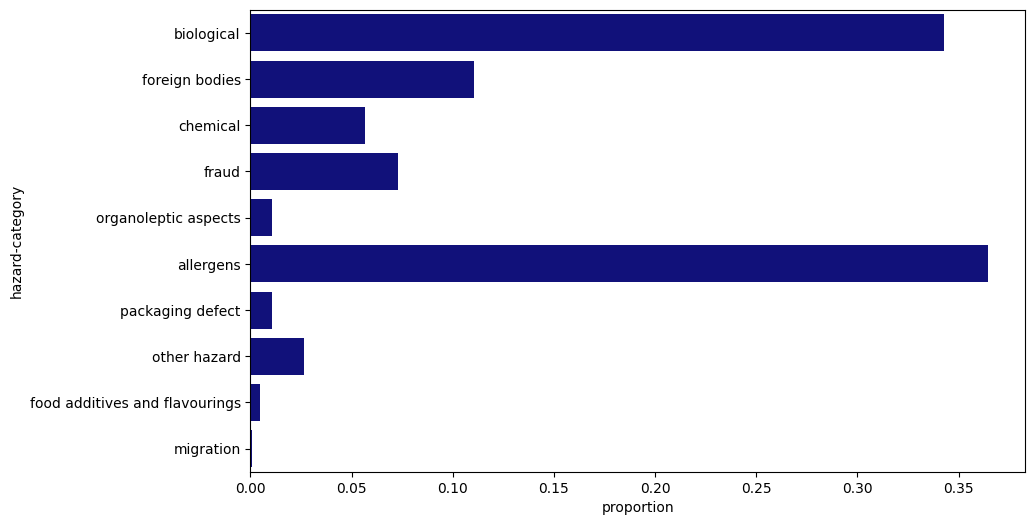

In [6]:
# Proporção de categorias de risco
plt.figure(figsize=(10, 6))
sns.countplot(y='hazard-category', data=df, orient='h', stat='proportion',color='darkblue')
plt.show()


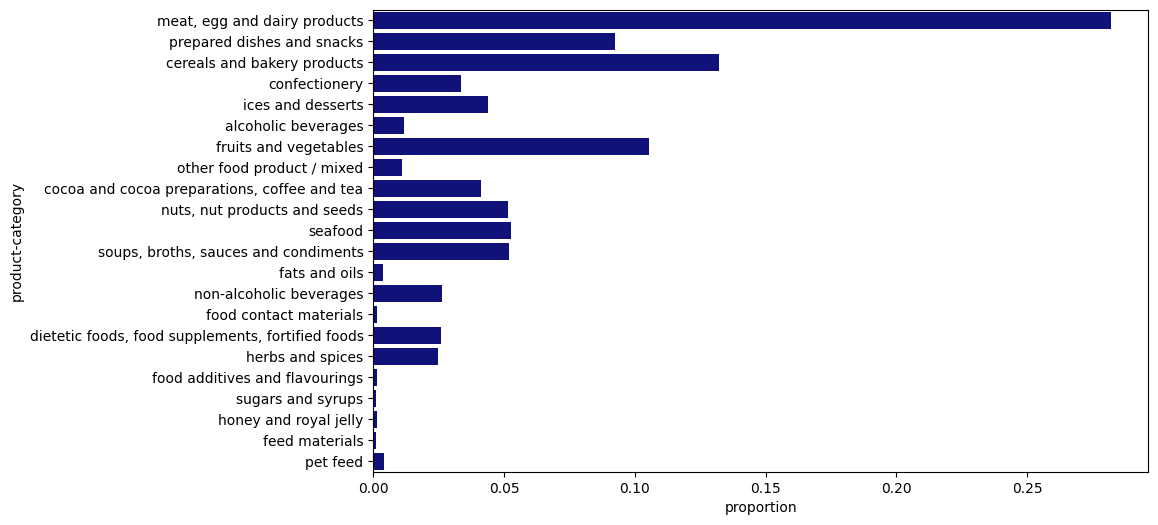

In [7]:
# Proporção de categorias de risco
plt.figure(figsize=(10, 6))
sns.countplot(y='product-category', data=df, orient='h', stat='proportion',color='darkblue')
plt.show()


Dados altamente desbalanceados, provável necessidade de utilização de **class weights**

### Bivariada

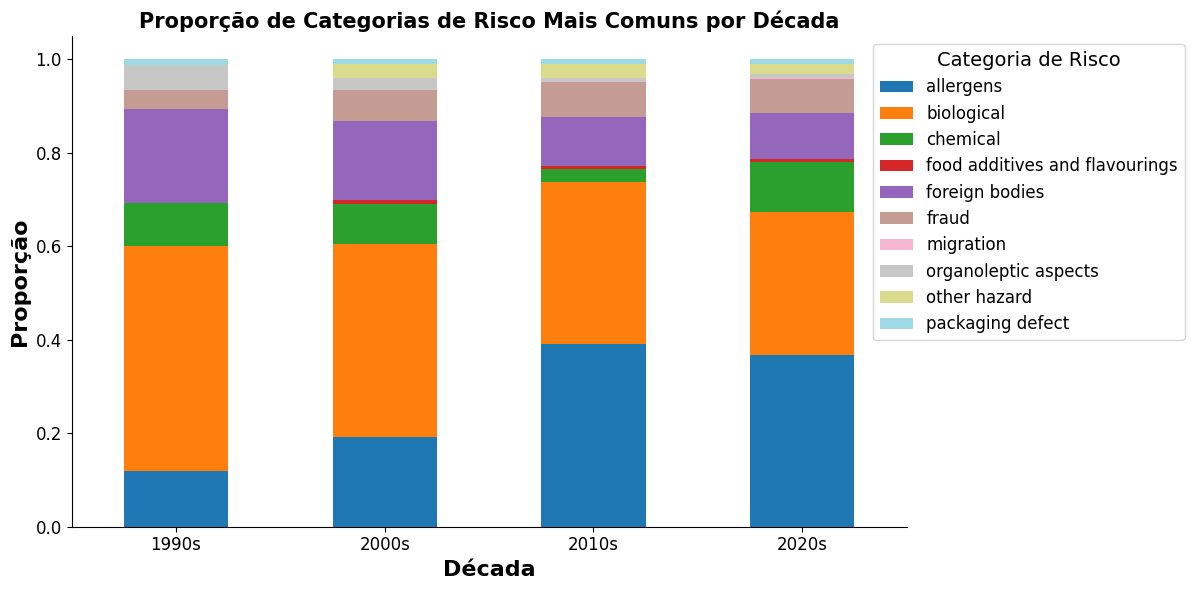

In [8]:
# Categorias de risco mais comuns por década (proporcional)
# Podemos usar a coluna year para agrupar por década

df['decade'] = df['year'] // 10 * 10
df['decade'] = df['decade'].astype(str) + 's'

# Calcular a proporção de cada categoria de risco por década
decade_hazard_counts = df.groupby(['decade', 'hazard-category']).size().unstack(fill_value=0)
decade_totals = decade_hazard_counts.sum(axis=1)
proportions = decade_hazard_counts.div(decade_totals, axis=0)

# Plotar as proporções
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Adicionar títulos e rótulos
ax.set_title('Proporção de Categorias de Risco Mais Comuns por Década', fontsize=15, weight='bold')
ax.set_xlabel('Década', fontsize=16, weight='bold')
ax.set_ylabel('Proporção', fontsize=16, weight='bold')

# Ajustar a legenda
ax.legend(title='Categoria de Risco', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(0.95, 1), ncol=1)

# Personalizar parâmetros dos ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remover as bordas superior e direita
sns.despine()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


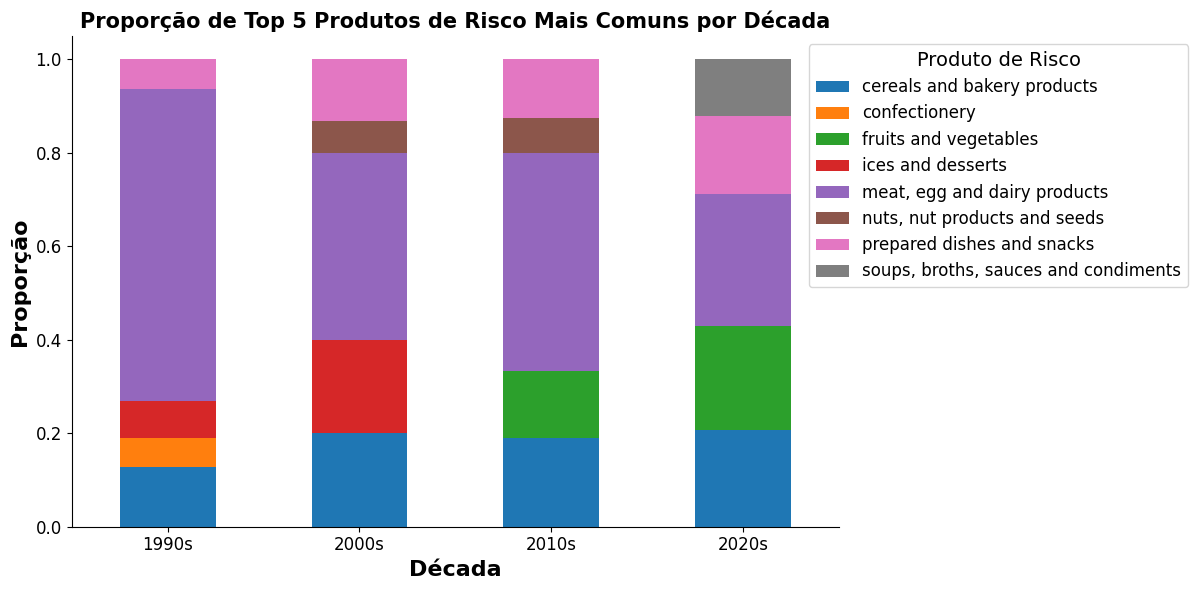

In [9]:
# Produtos de risco mais comuns por década (proporcional)
# Calcular a proporção de cada categoria de risco por década
decade_product_counts = df.groupby(['decade', 'product-category']).size().unstack(fill_value=0)

# make it top 5 per decade
decade_product_counts = decade_product_counts.apply(lambda x: x.nlargest(5), axis=1)

decade_totals = decade_product_counts.sum(axis=1)
proportions = decade_product_counts.div(decade_totals, axis=0)

# Plotar as proporções
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar títulos e rótulos
ax.set_title('Proporção de Top 5 Produtos de Risco Mais Comuns por Década', fontsize=15, weight='bold')
ax.set_xlabel('Década', fontsize=16, weight='bold')
ax.set_ylabel('Proporção', fontsize=16, weight='bold')

# Ajustar a legenda
ax.legend(title='Produto de Risco', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(0.95, 1), ncol=1)

# Personalizar parâmetros dos ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remover as bordas superior e direita
sns.despine()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

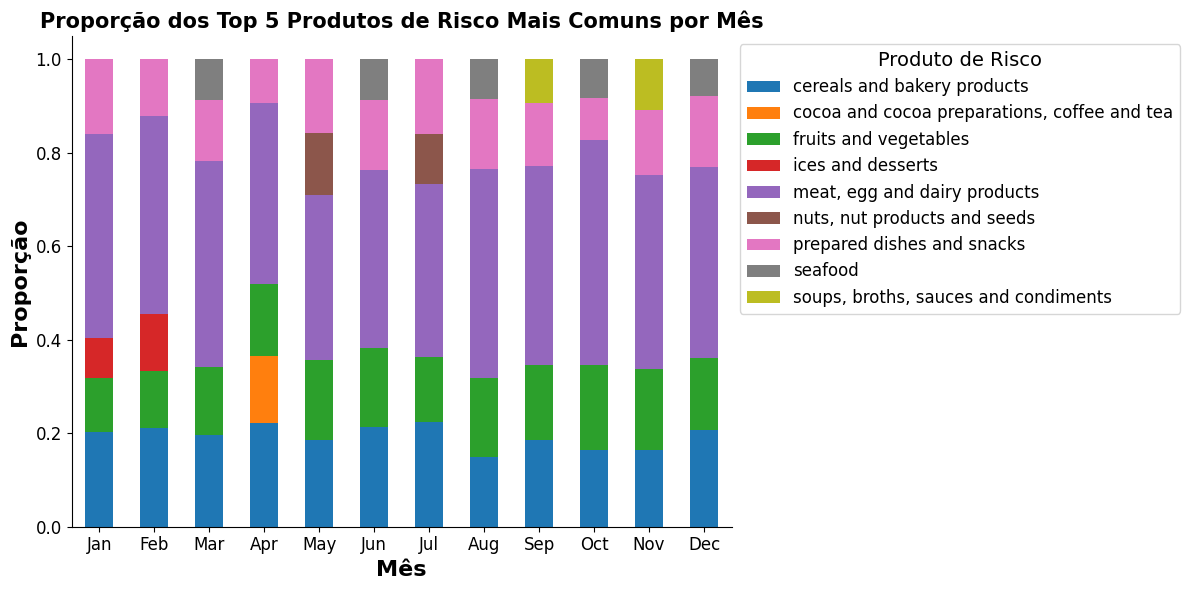

In [10]:
# Proporção de produtos de risco por mês (top 5 mais comuns, porque são muitos)
# Calcular a proporção de cada categoria de risco por mês

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calcular a contagem de cada categoria de produto por mês
month_product_counts = df.groupby(['month', 'product-category']).size().unstack(fill_value=0)

# Selecionar as 3 categorias mais comuns para cada mês
top5_month_product_counts = month_product_counts.apply(lambda x: x.nlargest(5).index, axis=1)

# Filtrar apenas as 3 categorias mais comuns
filtered_counts = month_product_counts.apply(lambda x: x[top5_month_product_counts.loc[x.name]], axis=1)

# Calcular a proporção de cada categoria de produto por mês
month_totals = filtered_counts.sum(axis=1)
proportions = filtered_counts.div(month_totals, axis=0)

# Plotar as proporções
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar títulos e rótulos
ax.set_title('Proporção dos Top 5 Produtos de Risco Mais Comuns por Mês', fontsize=15, weight='bold')
ax.set_xlabel('Mês', fontsize=16, weight='bold')

# Ajustar os ticks do eixo x
ax.set_xticks(np.arange(12))
ax.set_xticklabels(months, fontsize=12)

ax.set_ylabel('Proporção', fontsize=16, weight='bold')

# Ajustar a legenda
ax.legend(title='Produto de Risco', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Personalizar parâmetros dos ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remover as bordas superior e direita
sns.despine()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


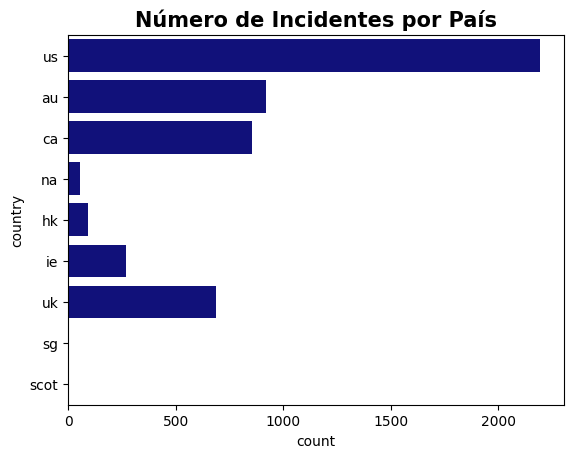

In [11]:
# number of incidents by country
sns.countplot(data=df, y='country', color='darkblue', stat='count', orient='v')
plt.title('Número de Incidentes por País', fontsize=15, weight='bold')
plt.show()

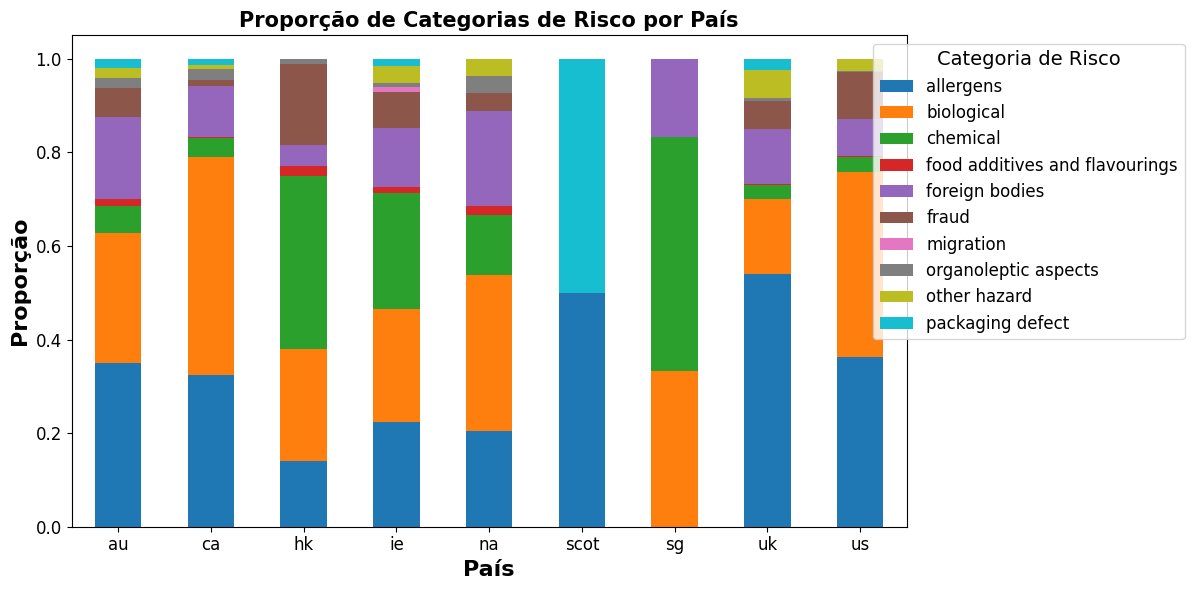

In [12]:
# Categorias de risco por país (proporcional)

# Calcular a proporção de cada categoria de risco por país
country_hazard_counts = df.groupby(['country', 'hazard-category']).size().unstack(fill_value=0)
country_totals = country_hazard_counts.sum(axis=1)
proportions = country_hazard_counts.div(country_totals, axis=0)

# Plotar as proporções
proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar títulos e rótulos
plt.title('Proporção de Categorias de Risco por País', fontsize=15, weight='bold')
plt.xlabel('País', fontsize=16, weight='bold')
plt.ylabel('Proporção', fontsize=16, weight='bold')
plt.legend(title='Categoria de Risco', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(0.95, 1), ncol=1)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

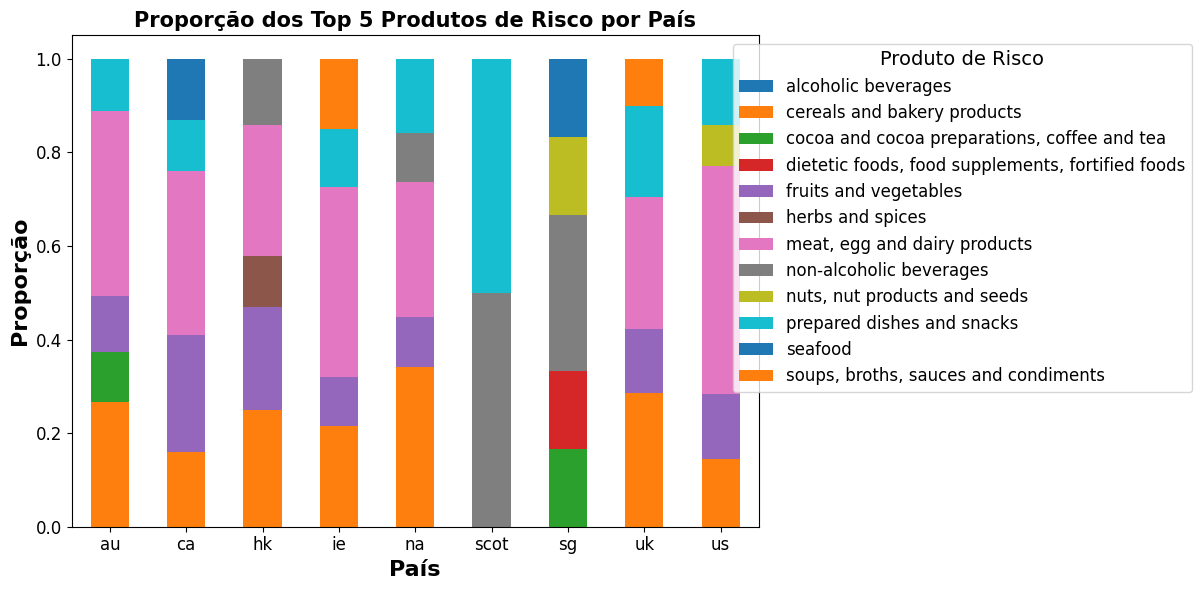

In [13]:
# Produtos de risco por país (proporcional)
# Calcular a proporção de cada categoria de risco por país
country_product_counts = df.groupby(['country', 'product-category']).size().unstack(fill_value=0)

# Selecionar os 5 produtos mais comuns para cada país
top5_country_product_counts = country_product_counts.apply(lambda x: x.nlargest(5), axis=1)

# Calcular a proporção de cada categoria de produto por país
country_totals = top5_country_product_counts.sum(axis=1)
proportions = top5_country_product_counts.div(country_totals, axis=0)

# Plotar as proporções
proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar títulos e rótulos
plt.title('Proporção dos Top 5 Produtos de Risco por País', fontsize=15, weight='bold')
plt.xlabel('País', fontsize=16, weight='bold')
plt.ylabel('Proporção', fontsize=16, weight='bold')
plt.legend(title='Produto de Risco', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(0.95, 1), ncol=1)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


Os países, anos e meses se demonstram ser boas features para a predição

In [14]:
from models.train import Classifier

clf = Classifier()

[INIT] Initializing Transformer Classifier
[INIT] Model: microsoft/deberta-v3-small
[INIT] Using device: cpu
[INIT] Initialization complete


## Hazard Category prediction

### Experiment 1:
Usando somente os dados textuais (title, hazard-category)

In [15]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df['hazard-category'])

In [20]:
temporal_features = df[['year', 'month']]
# normalize
temporal_features = (temporal_features - temporal_features.mean()) / temporal_features.std()

In [27]:
country_feature = df['country']
# encode one hot
country_feature = pd.get_dummies(country_feature).astype(float).to_numpy()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
add_feats = np.concatenate([temporal_features.to_numpy(), country_feature], axis=1)

(5082, 11)

In [37]:
# compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights

array([  0.27411003,   0.29190121,   1.77073171,  21.175     ,
         0.90588235,   1.36981132, 169.4       ,   9.58867925,
         3.79253731,   9.41111111])

In [31]:
clf.train_model(df['title'], labels, additional_features=add_feats, category='hazard-category', epochs=2, batch_size=32, class_weights=class_weights)


[TRAINING] Starting training
[TRAINING] Total texts: 5082
[TRAINING] Epochs: 2
[TRAINING] Batch size: 32
[TRAINING] Training set size: 4065
[TRAINING] Validation set size: 1017
[TRAINING] Loading tokenizer...
[TRAINING] Creating datasets...
[DATASET] Preparing dataset with 4065 texts
[DATASET] Dataset preparation completed in 0.34 seconds
[DATASET] Preparing dataset with 1017 texts
[DATASET] Dataset preparation completed in 0.12 seconds
[TRAINING] Creating data loaders...
[TRAINING] Number of labels: 10
[TRAINING] Additional feature size: 11
[TRAINING] Loading pre-trained model...
[TRAINING] Preparing optimizer and scheduler...
[TRAINING] Starting training loop...
[TRAINING] Epoch 1/2
[TRAINING] Epoch 1, Batch 0, Loss: 2.7082
[TRAINING] Epoch 1, Batch 10, Loss: 2.6785
[TRAINING] Epoch 1, Batch 20, Loss: 2.1421
[TRAINING] Epoch 1, Batch 30, Loss: 1.4962
[TRAINING] Epoch 1, Batch 40, Loss: 1.6529
[TRAINING] Epoch 1, Batch 50, Loss: 1.4620


KeyboardInterrupt: 

In [30]:
clf.train_model_lora(df['title'], labels, additional_features=add_feats, category='hazard-category', epochs=2, batch_size=32)


[TRAINING] Starting training
[TRAINING] Total texts: 5082
[TRAINING] Epochs: 2
[TRAINING] Batch size: 32
[TRAINING] Training set size: 4065
[TRAINING] Validation set size: 1017
[TRAINING] Loading tokenizer...
[TRAINING] Creating datasets...
[DATASET] Preparing dataset with 4065 texts
[DATASET] Dataset preparation completed in 0.47 seconds
[DATASET] Preparing dataset with 1017 texts
[DATASET] Dataset preparation completed in 0.08 seconds
[TRAINING] Creating data loaders...
[TRAINING] Number of labels: 10
[TRAINING] Additional feature size: 11
[TRAINING] Loading pre-trained model...
deberta.embeddings.word_embeddings.weight: requires_grad=False
deberta.embeddings.LayerNorm.weight: requires_grad=False
deberta.embeddings.LayerNorm.bias: requires_grad=False
deberta.encoder.layer.0.attention.self.query_proj.weight: requires_grad=False
deberta.encoder.layer.0.attention.self.query_proj.bias: requires_grad=False
deberta.encoder.layer.0.attention.self.key_proj.weight: requires_grad=False
debert

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[TRAINING] Epoch 1, Batch 0, Loss: 2.5303
[TRAINING] Epoch 1, Batch 10, Loss: 2.4849
[TRAINING] Epoch 1, Batch 20, Loss: 2.2847
[TRAINING] Epoch 1, Batch 30, Loss: 2.3747
[TRAINING] Epoch 1, Batch 40, Loss: 2.5332
[TRAINING] Epoch 1, Batch 50, Loss: 2.4644
[TRAINING] Epoch 1, Batch 60, Loss: 2.3184
[TRAINING] Epoch 1, Batch 70, Loss: 2.4332
[TRAINING] Epoch 1, Batch 80, Loss: 2.5101
[TRAINING] Epoch 1, Batch 90, Loss: 2.2983


KeyboardInterrupt: 